# Machine learning - Detect Discipline

https://medium.com/@nutanbhogendrasharma/pytorch-convolutional-neural-network-with-mnist-dataset-4e8a4265e118

### 0. Imports

In [1]:
import pandas as pd
import math
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## 1. Filter & Merge Badminton Dataset

### 1.1 Merge sets

In [15]:
datasets_list = []
ms = pd.read_csv("./Badminton_Dataset/ms.csv")
datasets_list.append(ms)
md = pd.read_csv("./Badminton_Dataset/md.csv")
datasets_list.append(md)
ws = pd.read_csv("./Badminton_Dataset/ws.csv")
datasets_list.append(ws)
wd = pd.read_csv("./Badminton_Dataset/wd.csv")
datasets_list.append(wd)
xd = pd.read_csv("./Badminton_Dataset/xd.csv")
datasets_list.append(xd)

# ms = pd.read_csv("./1-Badminton/Badminton_Dataset/ms.csv")
# datasets_list.append(ms)
# md = pd.read_csv("./1-Badminton/Badminton_Dataset/md.csv")
# datasets_list.append(md)
# ws = pd.read_csv("./1-Badminton/Badminton_Dataset/ws.csv")
# datasets_list.append(ws)
# wd = pd.read_csv("./1-Badminton/Badminton_Dataset/wd.csv")
# datasets_list.append(wd)
# xd = pd.read_csv("./1-Badminton/Badminton_Dataset/xd.csv")
# datasets_list.append(xd)

merged_dataset = pd.DataFrame()
for dataset in datasets_list:
    merged_dataset = pd.concat([merged_dataset, dataset])

['tournament', 'city', 'country', 'date', 'tournament_type', 'discipline', 'round', 'winner', 'nb_sets', 'retired', 'game_1_score', 'game_2_score', 'game_3_score', 'team_one_players', 'team_two_players', 'team_one_nationalities', 'team_two_nationalities', 'team_one_total_points', 'team_two_total_points', 'team_one_most_consecutive_points', 'team_two_most_consecutive_points', 'team_one_game_points', 'team_two_game_points', 'team_one_most_consecutive_points_game_1', 'team_two_most_consecutive_points_game_1', 'team_one_game_points_game_1', 'team_two_game_points_game_1', 'game_1_scores', 'team_one_most_consecutive_points_game_2', 'team_two_most_consecutive_points_game_2', 'team_one_game_points_game_2', 'team_two_game_points_game_2', 'game_2_scores', 'team_one_most_consecutive_points_game_3', 'team_two_most_consecutive_points_game_3', 'team_one_game_points_game_3', 'team_two_game_points_game_3', 'game_3_scores']


### 1.2 Format data & filter unnecesary fields

In [3]:
print(list(merged_dataset.columns))

['tournament', 'city', 'country', 'date', 'tournament_type', 'discipline', 'round', 'winner', 'nb_sets', 'retired', 'game_1_score', 'game_2_score', 'game_3_score', 'team_one_players', 'team_two_players', 'team_one_nationalities', 'team_two_nationalities', 'team_one_total_points', 'team_two_total_points', 'team_one_most_consecutive_points', 'team_two_most_consecutive_points', 'team_one_game_points', 'team_two_game_points', 'team_one_most_consecutive_points_game_1', 'team_two_most_consecutive_points_game_1', 'team_one_game_points_game_1', 'team_two_game_points_game_1', 'game_1_scores', 'team_one_most_consecutive_points_game_2', 'team_two_most_consecutive_points_game_2', 'team_one_game_points_game_2', 'team_two_game_points_game_2', 'game_2_scores', 'team_one_most_consecutive_points_game_3', 'team_two_most_consecutive_points_game_3', 'team_one_game_points_game_3', 'team_two_game_points_game_3', 'game_3_scores', 'team_one_player_one', 'team_one_player_two', 'team_two_player_one', 'team_two_

In [4]:
def formatScoreGame(value):
    if(pd.isnull(value)): 
        return []
    else: 
        score = value.split("-")
        ret = []
        for val in score:
            ret.append(int(val))
        return ret
        
def formatScoreGame(value):
    if(pd.isnull(value)): 
        return []
    else: 
        score = value.split("-")
        ret = []
        for val in score:
            ret.append(int(val))
        return ret

def formatTotalScore(value):
    if(pd.isnull(value)):
        return 0
    else: 
        return int(value)

def formatScoreGameT1(value):
    if(value == 0 or len(value) == 0): 
        return 0
    else: 
        return value[0]
    
def formatScoreGameT2(value):
    if(value == 0 or len(value) == 0): 
        return 0
    else: 
        return value[1]

In [5]:
merged_dataset['game_1_score'] = merged_dataset['game_1_score'].apply(formatScoreGame)
merged_dataset['game_2_score'] = merged_dataset['game_2_score'].apply(formatScoreGame)
merged_dataset['game_3_score'] = merged_dataset['game_3_score'].apply(formatScoreGame)
merged_dataset['team_one_total_points'] = merged_dataset['team_one_total_points'].apply(formatTotalScore)
merged_dataset['team_two_total_points'] = merged_dataset['team_two_total_points'].apply(formatTotalScore)
merged_dataset['team_one_most_consecutive_points'] = merged_dataset['team_one_most_consecutive_points'].apply(formatTotalScore)
merged_dataset['team_two_most_consecutive_points'] = merged_dataset['team_two_most_consecutive_points'].apply(formatTotalScore)
merged_dataset['team_one_game_points'] = merged_dataset['team_one_game_points'].apply(formatTotalScore)
merged_dataset['team_two_game_points'] = merged_dataset['team_two_game_points'].apply(formatTotalScore)
merged_dataset['team_one_most_consecutive_points_game_1'] = merged_dataset['team_one_most_consecutive_points_game_1'].apply(formatTotalScore)
merged_dataset['team_two_most_consecutive_points_game_1'] = merged_dataset['team_two_most_consecutive_points_game_1'].apply(formatTotalScore)
merged_dataset['team_one_game_points_game_1'] = merged_dataset['team_one_game_points_game_1'].apply(formatTotalScore)
merged_dataset['team_two_game_points_game_1'] = merged_dataset['team_two_game_points_game_1'].apply(formatTotalScore)
merged_dataset['team_one_most_consecutive_points_game_2'] = merged_dataset['team_one_most_consecutive_points_game_2'].apply(formatTotalScore)
merged_dataset['team_two_most_consecutive_points_game_2'] = merged_dataset['team_two_most_consecutive_points_game_2'].apply(formatTotalScore)
merged_dataset['team_one_game_points_game_2'] = merged_dataset['team_one_game_points_game_2'].apply(formatTotalScore)
merged_dataset['team_two_game_points_game_2'] = merged_dataset['team_two_game_points_game_2'].apply(formatTotalScore)
merged_dataset['team_one_most_consecutive_points_game_3'] = merged_dataset['team_one_most_consecutive_points_game_3'].apply(formatTotalScore)
merged_dataset['team_two_most_consecutive_points_game_3'] = merged_dataset['team_two_most_consecutive_points_game_3'].apply(formatTotalScore)
merged_dataset['team_one_game_points_game_3'] = merged_dataset['team_one_game_points_game_3'].apply(formatTotalScore)
merged_dataset['team_two_game_points_game_3'] = merged_dataset['team_two_game_points_game_3'].apply(formatTotalScore)

formattedScoreGameT1 = merged_dataset['game_1_score'].apply(formatScoreGameT1)
formattedScoreGameT2 = merged_dataset['game_1_score'].apply(formatScoreGameT2)
merged_dataset['game_1_score_t1'] = formattedScoreGameT1
merged_dataset['game_1_score_t2'] = formattedScoreGameT2

formattedScoreGameT1 = merged_dataset['game_2_score'].apply(formatScoreGameT1)
formattedScoreGameT2 = merged_dataset['game_2_score'].apply(formatScoreGameT2)
merged_dataset['game_2_score_t1'] = formattedScoreGameT1
merged_dataset['game_2_score_t2'] = formattedScoreGameT2

formattedScoreGameT1 = merged_dataset['game_3_score'].apply(formatScoreGameT1)
formattedScoreGameT2 = merged_dataset['game_3_score'].apply(formatScoreGameT2)
merged_dataset['game_3_score_t1'] = formattedScoreGameT1
merged_dataset['game_3_score_t2'] = formattedScoreGameT2


filter= ['discipline','nb_sets', 'retired', 'team_one_total_points', 'team_two_total_points', 'team_one_most_consecutive_points', 
    'team_two_most_consecutive_points', 'team_one_game_points', 'team_two_game_points', 'team_one_most_consecutive_points_game_1', 'team_two_most_consecutive_points_game_1', 'team_one_game_points_game_1', 
    'team_two_game_points_game_1', 'team_one_most_consecutive_points_game_2', 'team_two_most_consecutive_points_game_2', 'team_one_game_points_game_2', 'team_two_game_points_game_2',
    'team_one_most_consecutive_points_game_3', 'team_two_most_consecutive_points_game_3', 'team_one_game_points_game_3', 'team_two_game_points_game_3', 'game_1_score_t1', 'game_1_score_t2', 'game_2_score_t1'
    'game_2_score_t2', 'game_3_score_t1', 'game_3_score_t2']
merged_dataset = merged_dataset.filter(items=filter)

print(list(merged_dataset.columns))

['discipline', 'nb_sets', 'retired', 'team_one_total_points', 'team_two_total_points', 'team_one_most_consecutive_points', 'team_two_most_consecutive_points', 'team_one_game_points', 'team_two_game_points', 'team_one_most_consecutive_points_game_1', 'team_two_most_consecutive_points_game_1', 'team_one_game_points_game_1', 'team_two_game_points_game_1', 'team_one_most_consecutive_points_game_2', 'team_two_most_consecutive_points_game_2', 'team_one_game_points_game_2', 'team_two_game_points_game_2', 'team_one_most_consecutive_points_game_3', 'team_two_most_consecutive_points_game_3', 'team_one_game_points_game_3', 'team_two_game_points_game_3', 'game_1_score_t1', 'game_1_score_t2', 'game_3_score_t1', 'game_3_score_t2']


In [6]:
# Keep only necessary columns
# We only want gender-neutral columns
filter= ['discipline','nb_sets', 'retired', 'game_1_score', 'game_2_score', 'game_3_score', 'team_one_total_points', 'team_two_total_points', 'team_one_most_consecutive_points', 
    'team_two_most_consecutive_points', 'team_one_game_points', 'team_two_game_points', 'team_one_most_consecutive_points_game_1', 'team_two_most_consecutive_points_game_1', 'team_one_game_points_game_1', 
    'team_two_game_points_game_1', 'team_one_most_consecutive_points_game_2', 'team_two_most_consecutive_points_game_2', 'team_one_game_points_game_2', 'team_two_game_points_game_2',
    'team_one_most_consecutive_points_game_3', 'team_two_most_consecutive_points_game_3', 'team_one_game_points_game_3', 'team_two_game_points_game_3']
merged_dataset = merged_dataset.filter(items=filter)

In [7]:
# # scatter plot matrix
# scatter_matrix(merged_dataset)
# pyplot.show()

# # histograms
# dataset.hist()
# pyplot.show()

### 1.4 Prepare Dataset for training

In [8]:
filter= ['nb_sets', 'retired', 'game_1_score', 'game_2_score', 'game_3_score', 'team_one_total_points', 'team_two_total_points', 'team_one_most_consecutive_points', 
    'team_two_most_consecutive_points', 'team_one_game_points', 'team_two_game_points', 'team_one_most_consecutive_points_game_1', 'team_two_most_consecutive_points_game_1', 'team_one_game_points_game_1', 
    'team_two_game_points_game_1', 'team_one_most_consecutive_points_game_2', 'team_two_most_consecutive_points_game_2', 'team_one_game_points_game_2', 'team_two_game_points_game_2',
    'team_one_most_consecutive_points_game_3', 'team_two_most_consecutive_points_game_3', 'team_one_game_points_game_3', 'team_two_game_points_game_3']
X = merged_dataset.filter(items=filter)
Y = merged_dataset.filter(items=['discipline'])
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1, shuffle=True)

## 2. Apply learning algorithms

In [9]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

LR: 0.292022 (0.010734)
LDA: 0.290513 (0.009654)
KNN: 0.245768 (0.006848)
CART: 0.224570 (0.011032)
NB: 0.249453 (0.015082)
SVM: 0.285737 (0.012308)


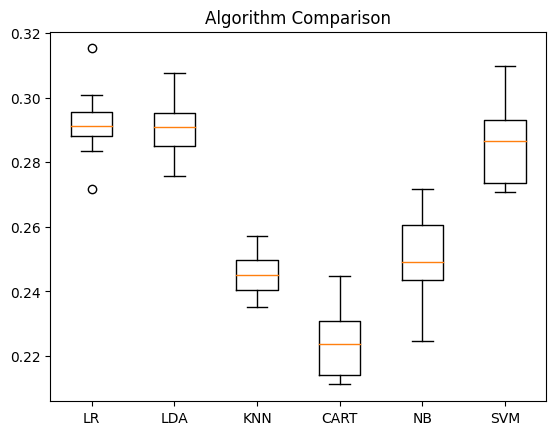

In [10]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train.values.ravel(), cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [13]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train.values.ravel())
predictions = model.predict(X_validation)

In [14]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.26541554959785524
[[165 208  25  69  64]
 [112 412  48 106  83]
 [112 227  39  84  55]
 [ 91 291  48 114  56]
 [141 249  35  88  62]]
              precision    recall  f1-score   support

          MD       0.27      0.31      0.29       531
          MS       0.30      0.54      0.38       761
          WD       0.20      0.08      0.11       517
          WS       0.25      0.19      0.21       600
          XD       0.19      0.11      0.14       575

    accuracy                           0.27      2984
   macro avg       0.24      0.25      0.23      2984
weighted avg       0.24      0.27      0.24      2984

